# Data Science Academy - Previsão de Ocorrências de Doênças - 1º Semana
## Ricardo Galiardi - rgaliardi@gmail.com

## Competição DSA de Machine Learning
### Competição DSA de Machine Learning -  Edição Janeiro/2019

## Descrição
    O conjunto de dados é do Instituto Nacional de Diabetes e Doenças Digestivas e Renais 
    (National Institute of Diabetes and Digestive and Kidney Diseases). O objetivo é prever 
    com base em medidas de diagnóstico, se um paciente tem diabetes. Várias restrições foram 
    colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos 
    os pacientes aqui são do sexo feminino com pelo menos 21 anos de idade.

In [1]:
# Importando os módulos das bibliotecas de Data Science

import sys
import IPython 
from IPython import display

import numpy as np
import pandas as pd      

import sklearn as sk
import scipy as sp

import matplotlib as plt   
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import Functions as fn
import fn_MLComparison as fnc
import fn_MLAlgorithm as fna

# Faz com que os relatórios (plots) sejam apresentados em uma célula e não em uma nova janela
%matplotlib inline       

-------------------------


In [2]:
# Checando as versões para acompanhamento de atualizações

print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(plt.__version__))
print("SciPy version: {}". format(sp.__version__)) 
print("scikit-learn version: {}". format(sk.__version__))
print("Seaborn version: {}". format(sns.__version__)) 
print("IPython version: {}". format(IPython.__version__)) 

Python version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
NumPy version: 1.14.3
pandas version: 0.23.0
matplotlib version: 2.2.2
SciPy version: 1.1.0
scikit-learn version: 0.19.1
Seaborn version: 0.8.1
IPython version: 6.4.0


In [3]:
# Prepara os dados - importando os datasets

dsTrain = pd.read_csv('./Data/dataset_treino.csv', 
                      names=['id', 'num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi', 'indice_historico', 'idade', 'classe'], 
                      sep=',', header=0)

dsTest  = pd.read_csv('./Data/dataset_teste.csv',  
                      names=['id', 'num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi', 'indice_historico', 'idade'], 
                      sep=',', header=0)

# Verifica a importação dos dados de treino
print(dsTrain.count())
print('\n')
# Verifica a importação dos dados de teste
print(dsTest.count())

id                   600
num_gestacoes        600
glicose              600
pressao_sanguinea    600
grossura_pele        600
insulina             600
bmi                  600
indice_historico     600
idade                600
classe               600
dtype: int64


id                   168
num_gestacoes        168
glicose              168
pressao_sanguinea    168
grossura_pele        168
insulina             168
bmi                  168
indice_historico     168
idade                168
dtype: int64


In [4]:
# Verifica valores nulos

dsTrain.isnull().sum()

id                   0
num_gestacoes        0
glicose              0
pressao_sanguinea    0
grossura_pele        0
insulina             0
bmi                  0
indice_historico     0
idade                0
classe               0
dtype: int64

In [5]:
dsTrain.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
id                   600 non-null int64
num_gestacoes        600 non-null int64
glicose              600 non-null int64
pressao_sanguinea    600 non-null int64
grossura_pele        600 non-null int64
insulina             600 non-null int64
bmi                  600 non-null float64
indice_historico     600 non-null float64
idade                600 non-null int64
classe               600 non-null int64
dtypes: float64(2), int64(8)
memory usage: 47.0 KB


## Analisando os dados 

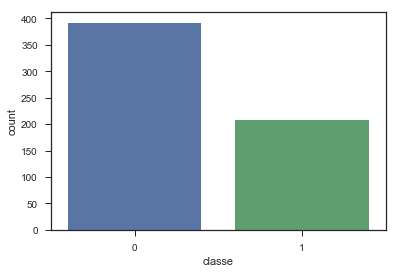

In [7]:
# Checando a variável Preditora
sns.countplot(x='classe',data=dsTrain)

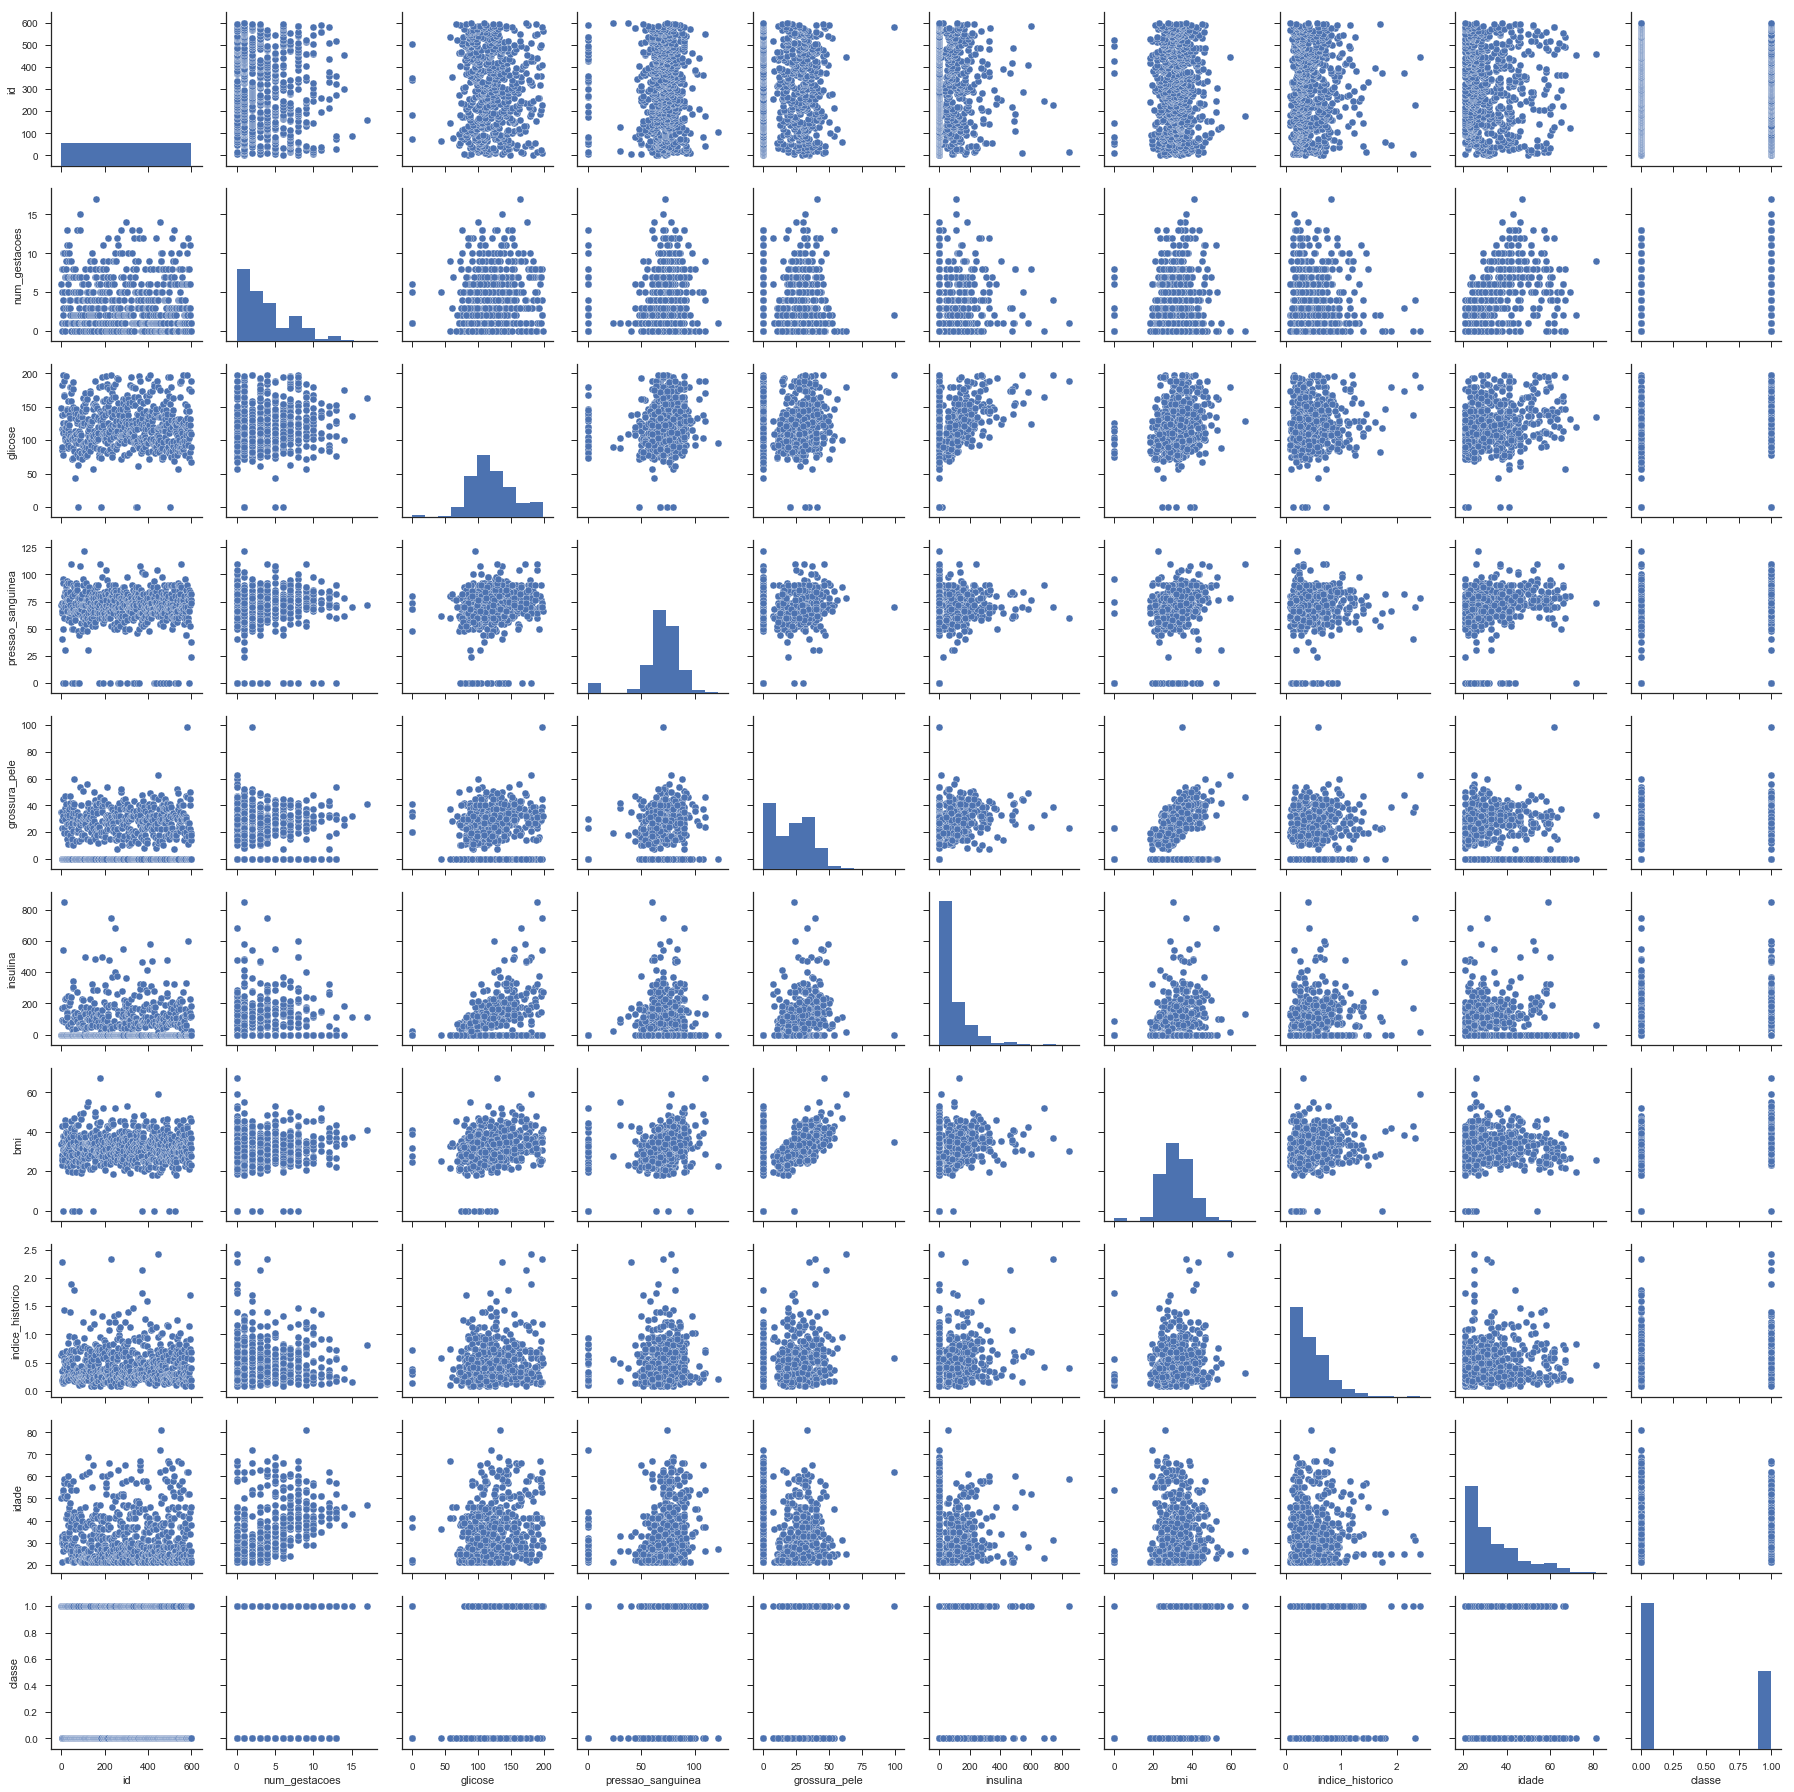

In [8]:
# Checando as variáveis Independentes
sns.pairplot(data=dsTrain)

In [9]:
# Checando as varíaveis - Sumarizado Estatístico
dsTrain.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
id,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
num_gestacoes,0.028834,0.532926,0.339553,0.271557,0.428922,0.428922,0.377854,0.218154,0.532926
glicose,0.008577,0.139924,0.274294,0.226710,0.377854,0.339553,0.271557,0.176640,0.274294
pressao_sanguinea,-0.000328,0.118589,0.216336,0.197539,0.197539,0.218154,0.216336,0.144771,0.226710
grossura_pele,-0.002386,0.034970,0.144771,0.143653,0.176640,0.183903,0.183903,0.127945,0.047187
insulina,-0.013234,-0.051889,0.143653,0.118589,0.054515,0.094150,0.127945,0.033781,0.033781
bmi,-0.022520,-0.055261,0.139924,0.094150,0.028834,-0.000328,0.047187,0.008882,0.008577
indice_historico,-0.033261,-0.080628,0.054515,0.008882,-0.080628,-0.011876,0.034970,-0.002386,-0.011876
idade,-0.081928,-0.081928,-0.033261,-0.022520,-0.121348,-0.055261,-0.013234,-0.051889,-0.121348


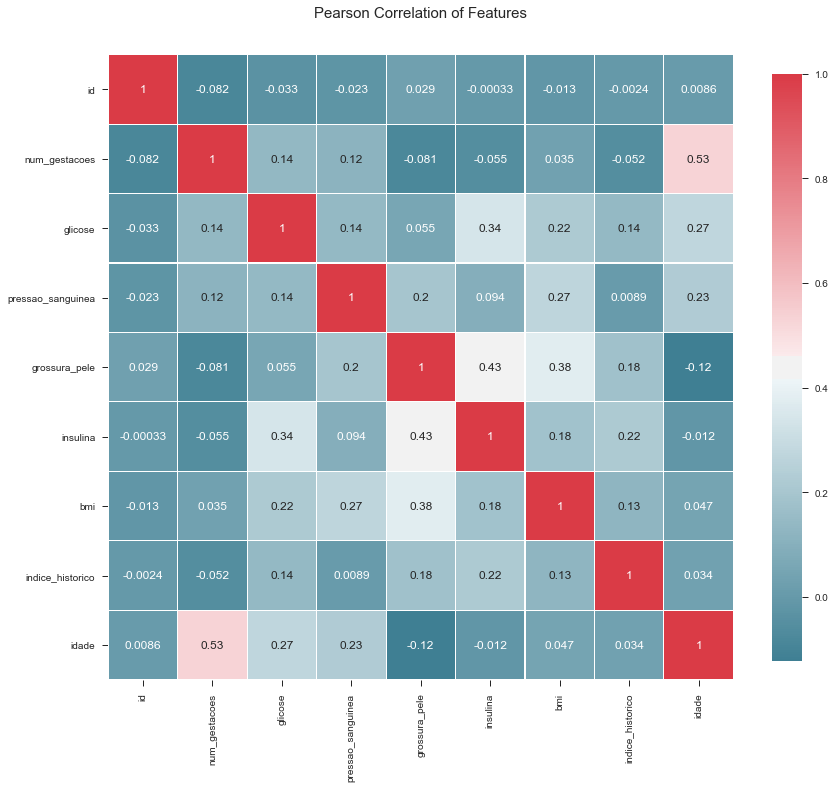

In [10]:
# Análise de Correlação de Pearson das variáveis

columns = ['id', 'num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi', 'indice_historico', 'idade']
fn.correlation_heatmap(dsTrain[columns])
dsTrain[columns].corr().apply(lambda x: x.sort_values(ascending=False).values)

## Analisando e Definindo os Modelos

In [11]:
# Criando cópias dos datasets para manipulação e manter os datasets originais

mTrain = dsTrain.copy()
mTest = dsTest.copy()

In [61]:
# Definição das classes de variáveis aplicaveis aos modelos
columns = ['num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi', 'indice_historico', 'idade']

# X_train - define os dados independentes de treino
X_train = mTrain[columns]

# y_train - define a variável preditora
y_train = mTrain['classe']

# X_test - define os dados independentes de teste
X_test = mTest[columns]

# y_test - define a variável preditora
y_test = mTrain['id']

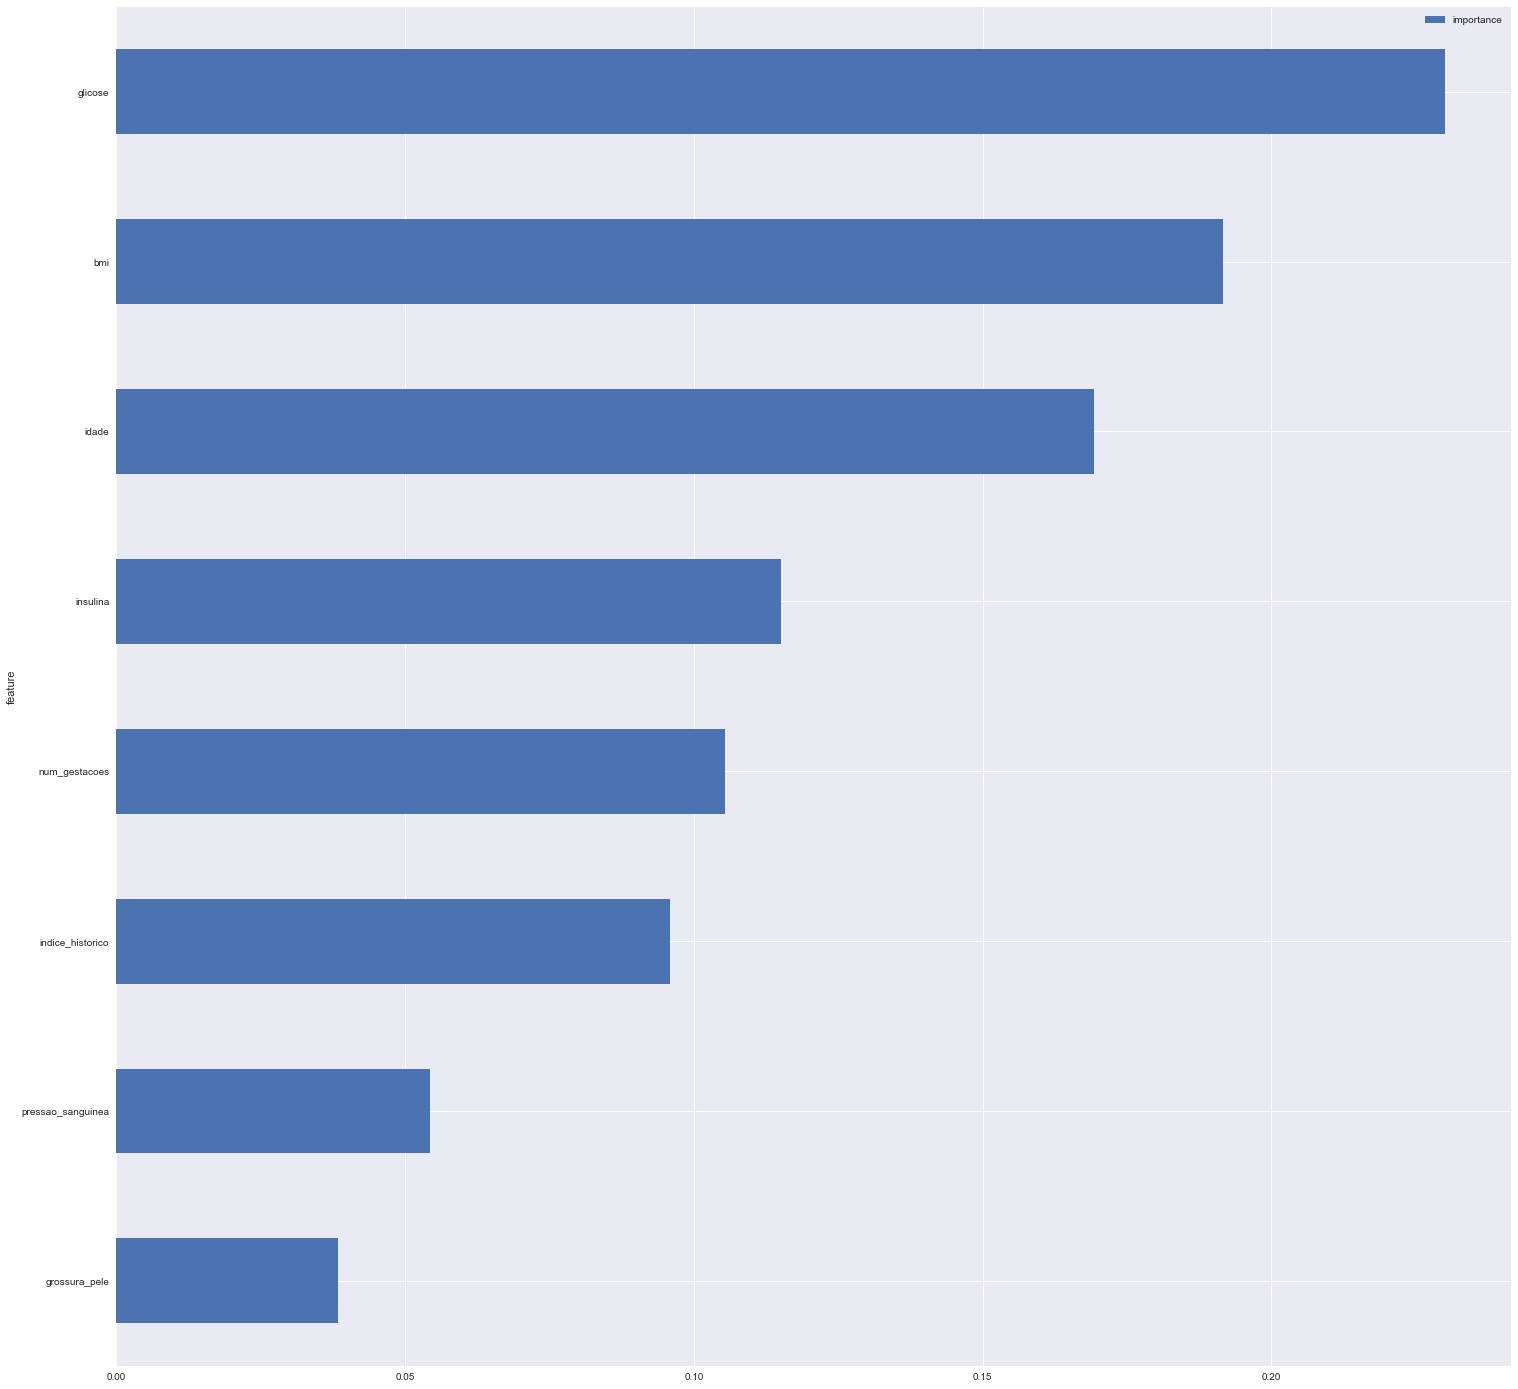

In [62]:
# Verificação das variáveis independentes e sua classificação

from sklearn.model_selection import KFold, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=50, max_features='sqrt')
predictions = clf.fit(X_train, y_train)

features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = predictions.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

## Classificação por Comparação

Series([], Name: (RidgeClassifierCV, 0.915), dtype: float64)


,
Classifier,Accuracy
RidgeClassifierCV,0.915000
LinearDiscriminantAnalysis,0.915000
GradientBoostingClassifier,0.911667
LogisticRegressionCV,0.911667
GaussianNB,0.911667
XGBClassifier,0.900000
ExtraTreesClassifier,0.900000
QuadraticDiscriminantAnalysis,0.896667
AdaBoostClassifier,0.886667


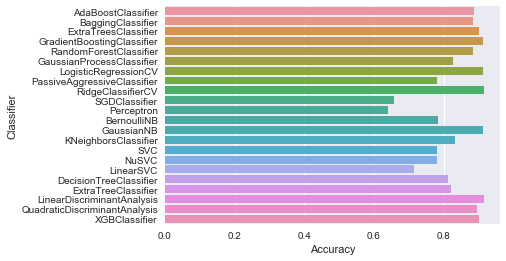

In [50]:
# Classifier(splits, target, features)

#classifiers = fnc.Classifier(12, y_train, X_train)
classifiers = fnc.Classifier(12, y_train, X_train)
print(classifiers.iloc[0])
classifiers

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [ 2.00750001e-02  5.44472539e-03 -1.90712175e-03 -4.26278477e-04
 -1.20939764e-04  1.46925613e-02  1.58155586e-01  1.32756030e-03]


ValueError: Found input variables with inconsistent numbers of samples: [600, 168]

In [59]:
# Cria a matriz de Confusao: Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model

print('Confusion Matrix - RidgeClassifierCV')
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#predictions = cross_val_predict(RidgeClassifierCV(), X_train, y_train, cv=10)
#pd.DataFrame(confusion_matrix(y_train, predictions), columns=['True', 'False'], index=['True', 'False'])

Confusion Matrix - RidgeClassifierCV


## Gerando o Resultado

In [56]:
## output(output, test, name)
#predictions = cross_val_predict(RidgeClassifierCV(), X_train, y_train, cv=10)

df_output = pd.DataFrame()
df_output['id'] = mTrain['id'].astype(int)
df_output['classe'] = predictions.astype(int)


filename = './Predictions/mlc' + '.csv'
df_output[['id','classe']].to_csv(filename, index=False)    
print('ok - arquivo gerado: ' + filename)

ok - arquivo gerado: ./Predictions/mlc.csv


In [60]:
predictions

array([ 1.01682611e-01,  2.34789771e-01,  1.79054667e-01,  6.55399088e-01,
        7.51485824e-01,  3.78528346e-01,  7.95555440e-01, -4.07311785e-02,
        4.86192411e-01,  5.98373226e-02,  2.14575190e-01,  6.65328597e-01,
        7.45724673e-01,  3.54737225e-01,  6.63654850e-01,  1.23914723e-01,
        2.27139705e-01, -1.72494403e-01,  4.83544464e-01,  3.54333874e-01,
        2.65176213e-01,  2.25088952e-01,  1.00403851e+00,  2.50984425e-01,
        1.87733969e-01,  2.05787730e-01,  1.50482657e-01,  3.12232334e-01,
        4.11818531e-01,  4.91663850e-02,  3.78862203e-01,  1.31277798e-01,
        1.76024754e-01,  1.58887991e-01,  2.07738059e-01,  4.48522408e-01,
        2.12777077e-01,  1.65030878e-01,  4.56448065e-01, -6.38050443e-02,
        1.23869598e-01,  4.03674952e-01,  4.72426342e-01,  2.95557460e-01,
        1.85571330e-01,  1.75865715e-02,  3.98077223e-01,  6.77431427e-01,
        4.59356162e-01,  7.31647291e-02,  3.81551763e-03,  3.02420930e-01,
        3.59528776e-01,  